In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso, Ridge

from sklearn.metrics import mean_squared_error

In [2]:
data_pd = pd.read_csv('/Users/msyzdykova/Desktop/dataset DS project/final scraped df/final_df_new.csv')

In [3]:
data_pd

,Unnamed: 0,Player,Nation,Pos,Squad,Age,90s,Standard_Gls,Standard_Sh,Standard_SoT,...,Performance_TklW,Performance_PKwon,Performance_PKcon,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,League,Market Value
0,0,William Saliba,FRA,DF,Arsenal,22.0,38.0,2,10,3,...,26,0,1,0,213,72,49,0.595,EPL,80000000.0
1,1,James Tarkowski,ENG,DF,Everton,30.0,38.0,1,25,4,...,42,0,1,0,186,140,61,0.697,EPL,13000000.0
2,2,Joachim Andersen,DEN,DF,Crystal Palace,27.0,37.9,2,21,8,...,35,0,0,0,193,89,46,0.659,EPL,35000000.0
3,3,Florian Lejeune,FRA,DF,Rayo Vallecano,32.0,37.0,3,67,21,...,25,0,0,1,173,80,49,0.620,La Liga,3000000.0
4,4,Dominic Solanke,ENG,FW,Bournemouth,25.0,36.9,19,106,35,...,11,1,0,0,97,97,135,0.418,EPL,45000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,615,Andrey Santos,BRA,MF,Nott'ham Forest,19.0,0.1,0,2,0,...,0,0,0,0,0,0,0,0.000,EPL,18000000.0
616,616,César Tárrega,ESP,DF,Valencia,21.0,0.1,0,0,0,...,0,0,0,0,0,0,0,0.000,La Liga,4000000.0
617,617,Mikey Moore,ENG,MF,Tottenham,15.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0.000,EPL,1000000.0
618,618,Donny van de Beek,NED,DF,Manchester Utd,26.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0.000,EPL,5000000.0


In [4]:
dropped_columns = ['Unnamed: 0', 'Player', 'Nation', 'Pos','Age', 'Squad', '90s', 'League','Market Value']

data_dropped_cols = data_pd.drop(dropped_columns, axis=1)
data = data_dropped_cols.to_numpy()
sc_data = StandardScaler()
data = sc_data.fit_transform(data)
data2 = data.copy()

mktval = data_pd['Market Value'].to_numpy().reshape(-1, 1)
sc_mkt_val = StandardScaler()
mktval = sc_mkt_val.fit_transform(mktval)
mktval2 = mktval.copy()

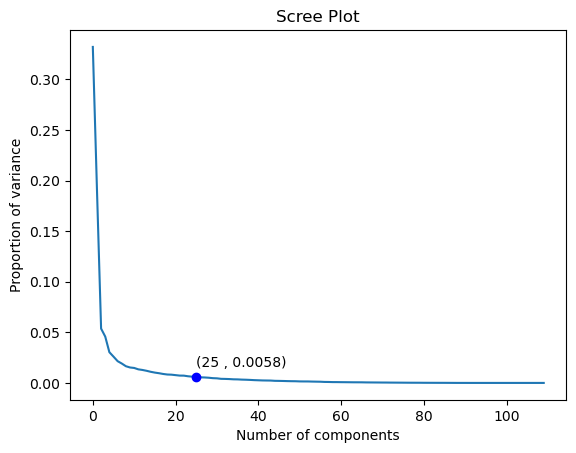

In [5]:
pca = PCA()
pca.fit(data)
plt.plot(pca.explained_variance_ratio_[:])
pca.explained_variance_ratio_[:]
# scree plot
plt.title('Scree Plot')
plt.xlabel('Number of components')
plt.ylabel('Proportion of variance')
plt.text(25,pca.explained_variance_ratio_[25]+0.01, f'(25 , {pca.explained_variance_ratio_[25]:.4f})')
plt.plot(25,pca.explained_variance_ratio_[25], 'bo')


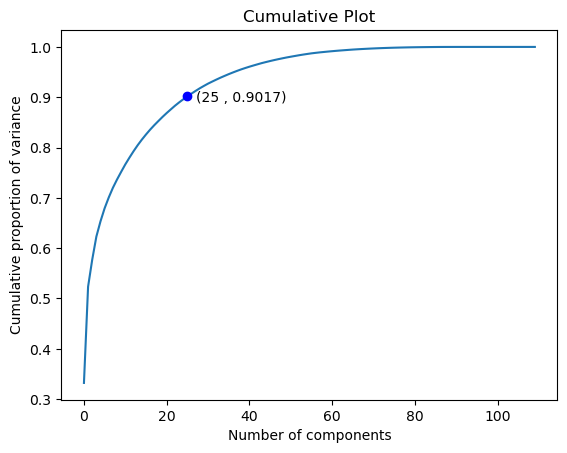

In [6]:
c_sum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(c_sum)
plt.title('Cumulative Plot')
plt.xlabel('Number of components')
plt.ylabel('Cumulative proportion of variance')
plt.text(25+2,c_sum[25]-0.01, f'(25 , {c_sum[25]:.4f})')
plt.plot(25,c_sum[25], 'bo')

In [7]:
for i in range(5):
    sorted_pca = np.argsort(pca.components_[i])[-5:][::-1]
    cols_upper = []
    for a1 in sorted_pca:
        cols_upper.append(data_dropped_cols.columns[a1])
    print(cols_upper)

    sorted_pca = np.argsort(pca.components_[i])[:5]
    cols_lower = []
    for a1 in sorted_pca:
        cols_lower.append(data_dropped_cols.columns[a1])
    print(cols_lower)
    print()

['Touches_Touches', 'Touches_Live', 'Performance_Recov', 'Receiving_Rec', 'Carries_TotDist']
['Take-Ons_Tkld%', 'Standard_Sh/90', 'Performance_OG', 'Expected_A-xAG', 'Performance_2CrdY']

['Standard_SoT/90', 'Touches_Att Pen', 'Carries_CPA', 'Standard_SoT', 'Expected_npxG']
['Touches_Def 3rd', 'Touches_Def Pen', 'Clr', 'Blocks_Sh', 'Total_PrgDist']

['Aerial Duels_Won', 'Aerial Duels_Lost', 'Expected_npxG/Sh', 'Standard_Gls', 'Expected_npxG']
['Performance_Crs', 'CrsPA', 'SCA Types_PassDead', 'Standard_Dist', 'GCA Types_PassDead']

['Performance_Fls', 'Tackles_Tkl', 'Tackles_TklW', 'Performance_TklW', 'Tackles_Mid 3rd']
['Total_Cmp%', 'Short_Cmp%', 'Medium_Cmp%', 'Carries_PrgDist', 'Standard_FK']

['Standard_PKatt', 'Standard_FK', 'SCA Types_PassDead', 'Standard_PK', 'Aerial Duels_Won']
['Expected_np:G-xG', 'Expected_G-xG', 'Standard_G/Sh', 'Total_Cmp%', 'Standard_G/SoT']



In [8]:
data_pca = pca.transform(data)
print(data.shape)
print(data_pca.shape)

(620, 110)
(620, 110)


In [9]:
reg = Lasso()
reg.fit(data2, mktval2)
print(reg.score(data2, mktval2))
print(np.sqrt(mean_squared_error(mktval2, reg.predict(data2))))

0.0
1.0


In [10]:
reg = Ridge()
reg.fit(data2, mktval2)
print(reg.score(data2, mktval2))
print(np.sqrt(mean_squared_error(mktval2, reg.predict(data2))))

0.6537510103440964
0.5884292562882165


In [12]:
reg = Lasso()
reg.fit(data_pca, mktval)
print(reg.score(data_pca, mktval))
print(np.sqrt(mean_squared_error(mktval, reg.predict(data_pca))))

0.21978148169205824
0.8832997896003042


In [13]:
reg = Ridge()
reg.fit(data_pca, mktval)
print(reg.score(data_pca, mktval))
print(np.sqrt(mean_squared_error(mktval, reg.predict(data_pca))))

0.6537510103440967
0.5884292562882163


In [14]:
l_vals = []
r_vals = []

for i in range(1,110):
    pca = PCA(n_components=i)
    pca.fit(data)
    data_pca = pca.transform(data)
    reg = Lasso()
    reg.fit(data_pca, mktval)
    a = reg.score(data_pca, mktval)
    reg = Ridge()
    reg.fit(data_pca, mktval)
    b = reg.score(data_pca, mktval)
    l_vals.append(a)
    r_vals.append(b)

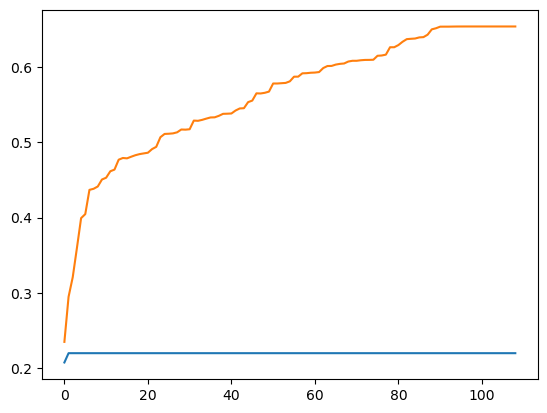

In [15]:
plt.plot(l_vals)
plt.plot(r_vals)